## 历史6月份的流量数据
### 绘制成折线图？
### 需要取平均值？

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import numpy as np
from scipy import stats
from scipy.stats import gamma, lognorm, norm, probplot
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import pandas as pd

# 读取历史月均流量数据
#df_hist = pd.read_csv("monthly_mean_1980_2025.csv")
df_hist=pd.read_excel('1948.1-2025.7monthly副本.xlsx')
#print(df_hist)
df_june = df_hist[df_hist['month'] == 6]
print(df_june)

# 示例列结构：
# Year, Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec
#june_hist = df_hist["Jun"].dropna()
june_mean_flow = df_june['mean_cfs'].mean()
print(f"6月份流量（mean_cfs）的平均值：{june_mean_flow:.2f}")
    # 可选：计算更多统计信息（如中位数、最大值、最小值，辅助分析）
june_flow_stats = df_june['mean_cfs'].describe()
print("\n6月份流量完整统计信息：")
print(june_flow_stats)

     year  month  mean_cfs
5    1948      6     234.3
17   1949      6      30.2
29   1950      6      66.3
41   1951      6     113.3
53   1952      6     183.7
..    ...    ...       ...
881  2021      6      66.0
893  2022      6      39.5
905  2023      6      30.6
917  2024      6      29.7
929  2025      6      74.9

[78 rows x 3 columns]
6月份流量（mean_cfs）的平均值：110.38

6月份流量完整统计信息：
count     78.000000
mean     110.384615
std      116.354511
min       19.500000
25%       38.875000
50%       69.900000
75%      113.225000
max      623.700000
Name: mean_cfs, dtype: float64


In [4]:
print("=== 6月份流量概率分布拟合分析 ===")

# 分离历史数据（1948-2024）和2025年数据
df_his = df_june[df_june['year'] < 2025]  # 历史数据（训练集）
df_2025 = df_june[df_june['year'] == 2025]  # 待预测的2025年数据

flow_data = df_his['mean_cfs'].values  # 历史数据（1948-2024）
year_2025 = 2025
flow_2025 = df_2025['mean_cfs'].values[0]

print(f"历史数据样本量: {len(flow_data)}年 (1948-2024)")
print(f"2025年6月流量: {flow_2025:.1f} cfs")
print(f"历史均值(1948-2024): {flow_data.mean():.2f} cfs")
print(f"历史标准差(1948-2024): {flow_data.std():.2f} cfs")

=== 6月份流量概率分布拟合分析 ===
历史数据样本量: 77年 (1948-2024)
2025年6月流量: 74.9 cfs
历史均值(1948-2024): 110.85 cfs
历史标准差(1948-2024): 116.28 cfs


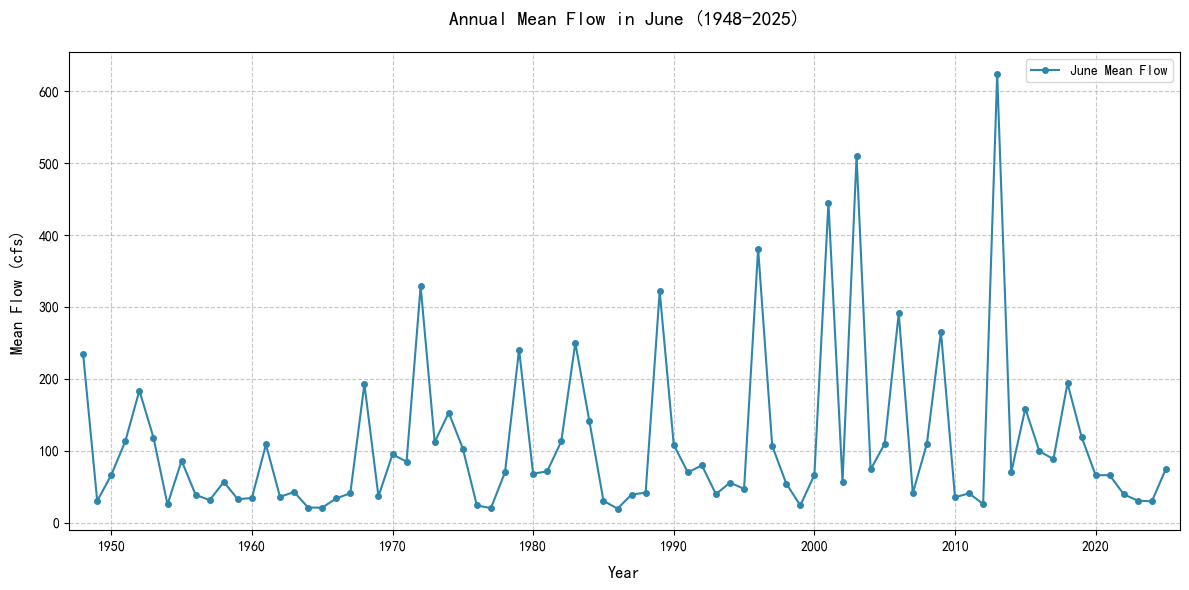

图表绘制完成！


In [5]:
#绘制折线图
#import matplotlib.pyplot as plt
#plt.plot(df_hist['year'], df_june, marker='o')
required_cols = ['year', 'mean_cfs']
df_june_sorted = df_june.sort_values(by='year', ascending=True).reset_index(drop=True)
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']  # 英文无乱码，如需中文：
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows
 # 创建画布（设置尺寸，让图表更清晰）
plt.figure(figsize=(12, 6))
    
    # 绘制折线图：x=年份，y=6月流量，添加标记点+美化线条
plt.plot(
    df_june_sorted['year'],  # x轴：年份
    df_june_sorted['mean_cfs'],  # y轴：6月流量
    marker='o',  # 每个数据点显示圆形标记
    markersize=4,  # 标记点大小
    linewidth=1.5,  # 线条宽度
    color='#2E86AB',  # 自定义线条颜色（蓝灰色，美观）
    label='June Mean Flow'  # 图例标签
    )
# 设置标题和轴标签
plt.title('Annual Mean Flow in June (1948-2025)', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12, labelpad=10)
plt.ylabel('Mean Flow (cfs)', fontsize=12, labelpad=10)
    
    # 添加网格（辅助阅读数据）
plt.grid(True, linestyle='--', alpha=0.7)
    
    # 添加图例
plt.legend(loc='best', fontsize=10)
    
    # 调整x轴刻度（避免年份挤在一起）
plt.xticks(rotation=0)  # 年份水平显示，如需旋转：rotation=45
plt.xlim(df_june_sorted['year'].min()-1, df_june_sorted['year'].max()+1)  # x轴范围扩展1年，更美观
    
    # 自动调整布局（避免标签被截断）
plt.tight_layout()
# 显示图表（运行代码后弹出窗口）
plt.savefig('历年6月流量趋势.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
    
    # 保存图表（保存为高清PNG，可替换为jpg/pdf）
    # plt.savefig('历年6月流量变化趋势.png', dpi=300, bbox_inches='tight')
print("图表绘制完成！")

### 可以用于计算分位数

In [6]:
june_stats = df_june['mean_cfs'].describe()
print("\n=== 从统计摘要中提取（验证） ===")
print(f"25% 百分位数：{june_stats['25%']:.2f} cfs")
print(f"50% 百分位数：{june_stats['50%']:.2f} cfs")
print(f"75% 百分位数：{june_stats['75%']:.2f} cfs")
    
    # ---------------------- 可选：将结果转为字典（方便后续使用） ----------------------
percentile_dict = {
    '25%': june_stats['25%'],
    '50%': june_stats['50%'],
    '75%': june_stats['75%']
    }
print("\n=== 百分位数字典（便于后续调用） ===")
print(percentile_dict)



=== 从统计摘要中提取（验证） ===
25% 百分位数：38.88 cfs
50% 百分位数：69.90 cfs
75% 百分位数：113.22 cfs

=== 百分位数字典（便于后续调用） ===
{'25%': np.float64(38.875), '50%': np.float64(69.9), '75%': np.float64(113.225)}


### 将逐小时的数据累加计算成月均流量（注意单位）

In [7]:
df_hourly = pd.read_csv("flow_hourly_baseline_2025_06.csv")
df_hourly["datetime"] = pd.to_datetime(df_hourly["datetime"])
# 直接算月平均（单位仍是 m³/s）
print(df_hourly)
print(df_hourly["flow_m3s"])
june_2025_mean_m3s = df_hourly["flow_m3s"].mean()
june_2025_mean_m3s
print(june_2025_mean_m3s)
june_2025_mean_cfs = june_2025_mean_m3s * 35.3147#上面算的是每个小时的平均，转成月份需要*720
june_2025_mean_cfs
print(june_2025_mean_cfs)

               datetime  flow_m3s
0   2025-06-01 00:00:00  3.230000
1   2025-06-01 01:00:00  3.355398
2   2025-06-01 02:00:00  3.472250
3   2025-06-01 03:00:00  3.572593
4   2025-06-01 04:00:00  3.649589
..                  ...       ...
235 2025-06-10 19:00:00  2.762009
236 2025-06-10 20:00:00  2.810411
237 2025-06-10 21:00:00  2.887407
238 2025-06-10 22:00:00  2.987750
239 2025-06-10 23:00:00  3.104602

[240 rows x 2 columns]
0      3.230000
1      3.355398
2      3.472250
3      3.572593
4      3.649589
         ...   
235    2.762009
236    2.810411
237    2.887407
238    2.987750
239    3.104602
Name: flow_m3s, Length: 240, dtype: float64
3.23
114.06648100000001


In [9]:
#plt.bar(june_2025_mean_cfs,height=50,width=5,color='r',label='2025年6月模拟流量')

### 流量判断

In [10]:
if june_2025_mean_cfs <= june_stats['25%']:
    flow_class = "Low-flow condition"
elif june_2025_mean_cfs >= june_stats['75%']:
    flow_class = "High-flow condition"
else:
    flow_class = "Normal-flow condition"

flow_class


'High-flow condition'